### 00. 데이터 & 패키지 불러오기

!pip install openpyxl

In [1]:
import pandas as pd
import numpy as np
import openpyxl
import glob

import seaborn as sns
import matplotlib.pyplot as plt

# 한글 폰트 사용을 위해서 세팅
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

Economic Outlook Survey

In [2]:
EOS = glob.glob('2021??.xlsx')
EOS

['202101.xlsx',
 '202102.xlsx',
 '202103.xlsx',
 '202104.xlsx',
 '202105.xlsx',
 '202106.xlsx',
 '202107.xlsx',
 '202108.xlsx',
 '202109.xlsx',
 '202110.xlsx',
 '202111.xlsx',
 '202112.xlsx']

### 01. 데이터 살펴보기
#### 1. 전체 데이터 결측값

In [69]:
#전체 데이터 결측값

for i in EOS:
    eos = pd.read_excel(i)
    #print(eos.isnull().sum())

WT          0
X1          0
X2          0
X3          0
X16         0
X17         0
X17_1       0
X20         0
X21         0
X30         0
X31         0
X32         0
X33         0
X34         0
X35         0
X36         0
X37         0
X38         0
X39         0
X40         0
X41         0
X42         0
X43         0
X44         0
X45         0
X46         0
X47         0
X48         0
X49         0
X55       908
X56      2618
X57      2442
X58      2278
X59      1919
X60      2434
X61      1687
X62      2644
X63      2759
X64      2546
X65      2410
X66      2803
X67      2766
X68      2458
X69      2735
X70      2836
X71      2919
dtype: int64
WT          0
X1          0
X2          0
X3          0
X16         0
X17         0
X17_1       0
X20         0
X21         0
X30         0
X31         0
X32         0
X33         0
X34         0
X35         0
X36         0
X37         0
X38         0
X39         0
X40         0
X41         0
X42         0
X43         0
X44         0
X45    

전체 데이터 결측값
+ X55 이후의 열에 공통적으로 결측값 확인 (기업경영상 애로요인)

##### 01. X55 이후 열 결측값 확인

In [54]:
all_EOS = pd.DataFrame()
date_list = []

for i in EOS:
    date_list.append(i.split('.')[0])
    eos = pd.read_excel(i)
    read_eos = pd.DataFrame(eos[['X55','X56', 'X57', 'X58', 'X59', 'X60', 'X61', 'X62', 'X63', 'X64', 'X65','X66', 'X67', 'X68', 'X69', 'X70', 'X71']].notnull().sum()).T
    all_EOS = pd.concat([all_EOS,read_eos],axis=0)

all_EOS.index = date_list
all_EOS

,X55,X56,X57,X58,X59,X60,X61,X62,X63,X64,X65,X66,X67,X68,X69,X70,X71
202101,2046,336,512,676,1035,520,1267,310,195,408,544,151,188,496,219,118,35
202102,2042,290,566,712,1043,523,1369,348,177,363,656,189,202,551,222,106,44
202103,1843,241,513,662,1075,536,1227,320,139,338,707,178,185,478,184,82,34
202104,1936,234,501,690,1195,594,1260,346,145,355,858,199,183,368,208,100,40
202105,1875,230,473,675,1169,651,1274,387,159,340,901,231,182,338,172,100,49
202106,1857,225,490,676,1168,622,1260,382,139,328,998,272,176,344,172,119,48
202107,1831,262,508,640,1192,627,1223,417,163,334,1076,298,187,389,160,107,50
202108,1842,250,518,645,1155,658,1311,456,169,341,1025,261,214,461,168,99,59
202109,1864,244,485,641,1174,635,1266,428,165,340,1046,227,194,463,179,118,56
202110,1865,266,485,556,1119,681,1291,424,176,316,1062,248,202,342,171,140,49


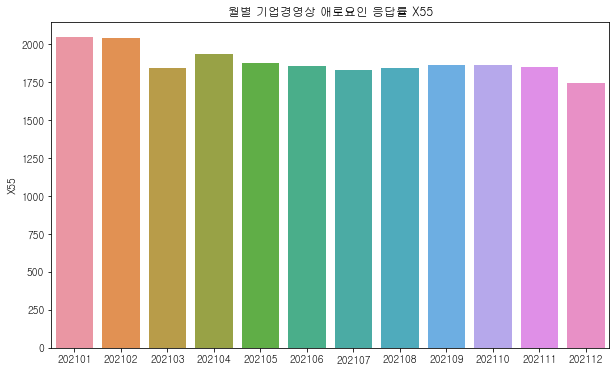

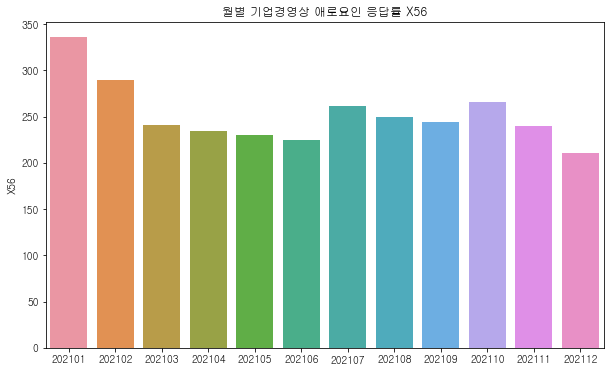

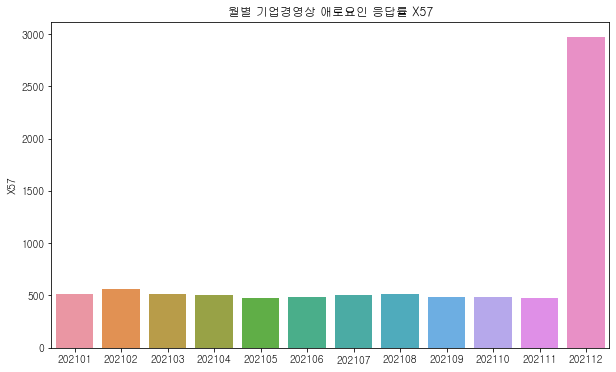

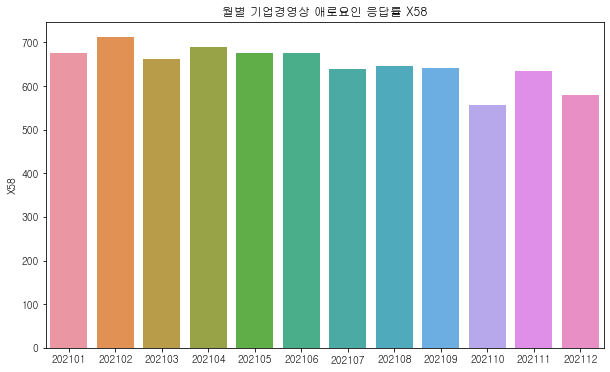

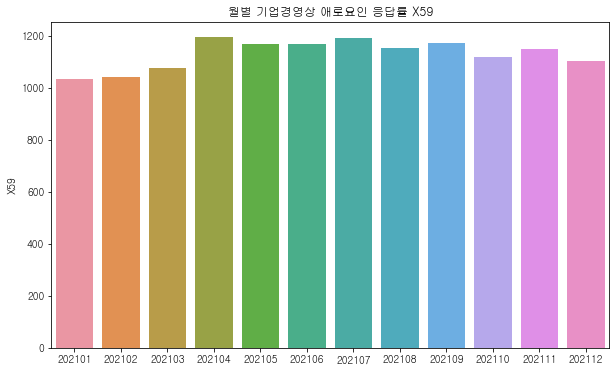

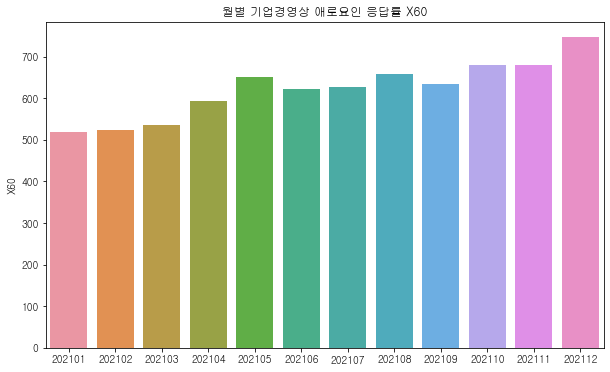

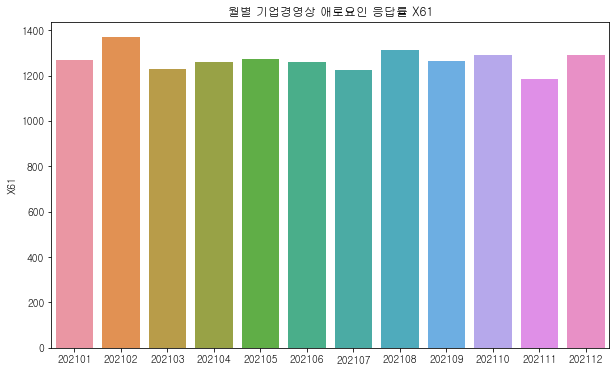

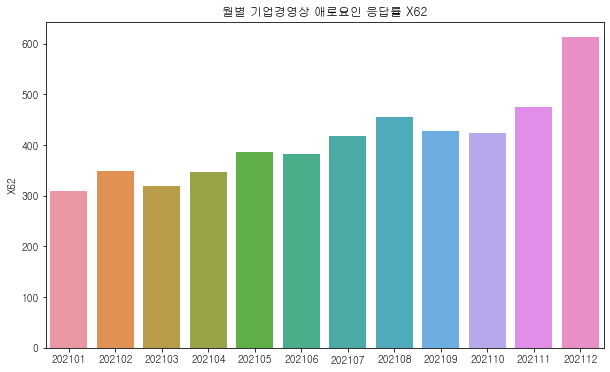

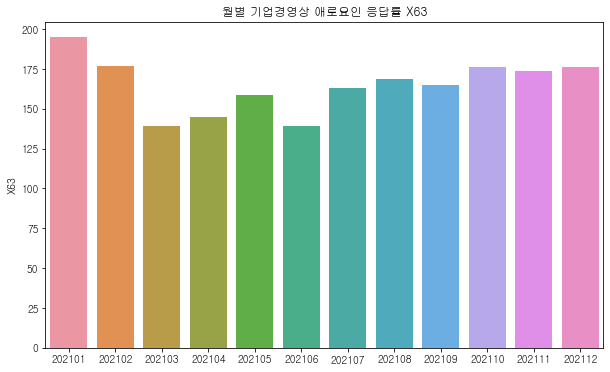

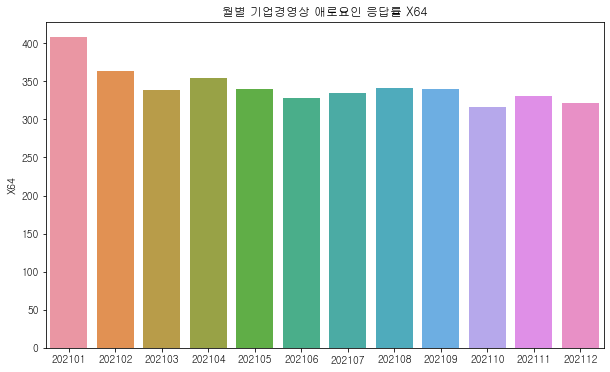

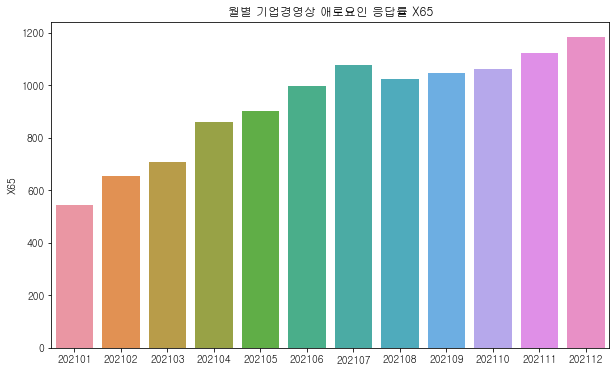

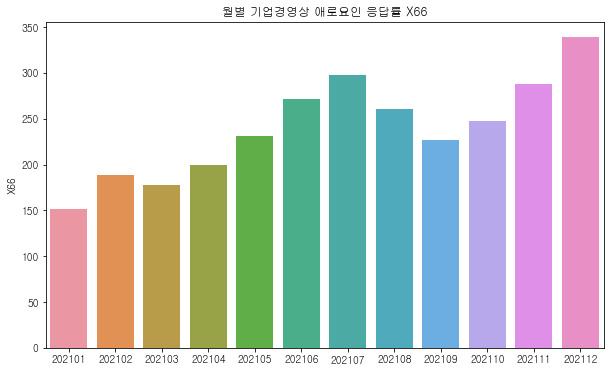

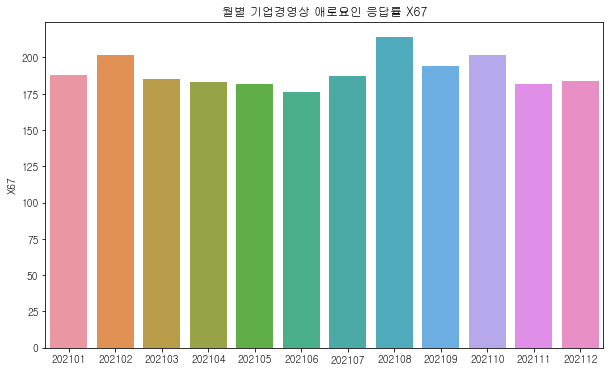

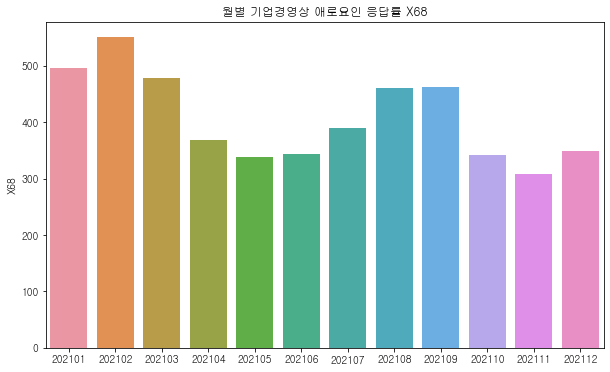

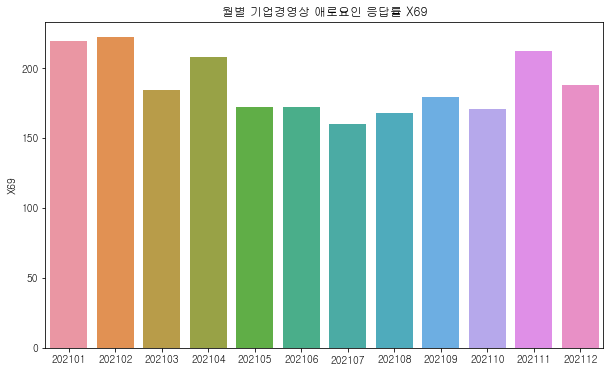

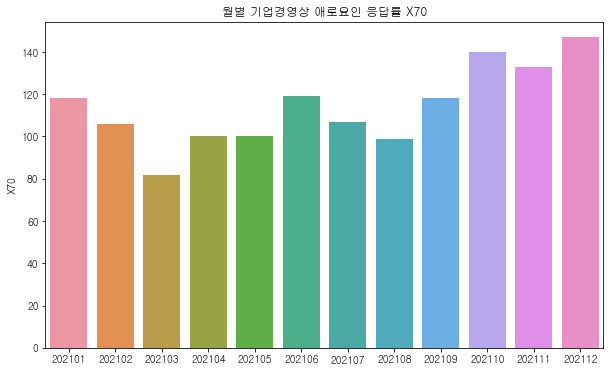

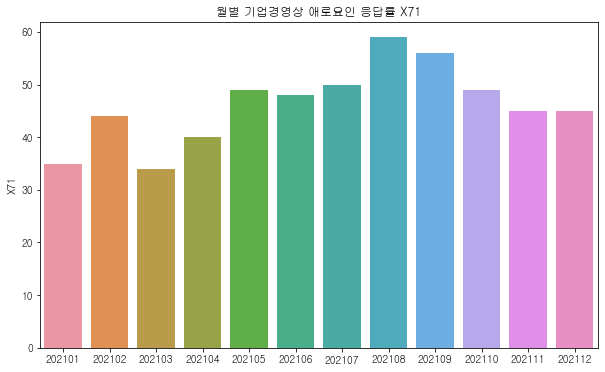

In [55]:
#월별 기업경영상 애로요인 응답률 EDA

for i in all_EOS.columns:
    plt.figure(figsize = (10,6))
    sns.barplot(x = all_EOS.index,y=i, data=all_EOS)
    plt.title('월별 기업경영상 애로요인 응답률 %s'%i)
    plt.show()

- X55 (기업경영상 애로요인) 이후로 결측값이 매우 많음
→ 불만 요인 파악 가능

꾸준히 불만이 많은 항목
1. X55 (내수 부진) : 2000
2. X61 (인건비 상승) : 1200~1400
3. X59 (업체당 과당경쟁) : 1000~1200


우상향 하는 응답항목 = 응답이 많아 지는 응답항목
1. X65 (600 ~ 1200) : (원재료 가격 상승) : 600 ~ 1200
2. X60 (인력확보난) : 500~700
3. X62 (물류비 상승 및 운송난) : 300 ~ 600
4. X66 (원재료 구득난) : 150 ~ 350

특이 케이스
1. X57 (판매대금회수 지연) : 3000    
    202112년만 응답

### 02. 항목별 비교

In [65]:
def Compair_items(item1,item2):
    X_Frame_1 = pd.DataFrame()
    X_Frame_2 = pd.DataFrame()
    date_list = []

    for i in EOS:
        date_list.append(i.split('.')[0])
        eos = pd.read_excel(i)
        X_Frame_1 = pd.concat([X_Frame_1,pd.DataFrame(eos.groupby([item1]).count()['WT'])],axis=1)
        X_Frame_2 = pd.concat([X_Frame_2,pd.DataFrame(eos.groupby([item2]).count()['WT'])],axis=1)
    
    X_Frame_1.columns = date_list
    X_Frame_2.columns = date_list
    
    #compair plot
    plt.figure(figsize = (12,8))
    sns.lineplot(data=X_Frame_1.T,palette='Oranges')
    sns.lineplot(data=X_Frame_2.T,palette='Blues')
    plt.title('월별 %s:oranges ,%s: blues'%(item1,item2))
    plt.xticks(rotation=45)
    plt.legend(loc='upper left',ncol=1)
    plt.show()

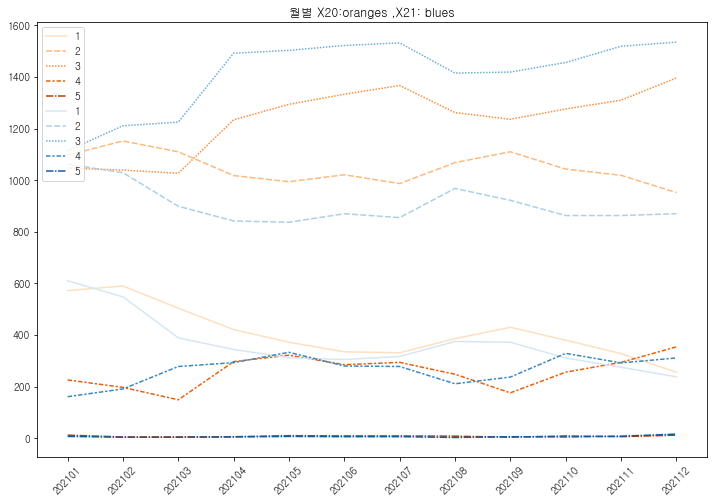

In [66]:
Compair_items('X20','X21')

### 제조업 분야의 기업 경영상 애로요인 재파악

전자부품, 컴퓨터, 영상, 음향, 및 통신장비 제조업

In [52]:
factory_col = [[18,27,33],[13,16,22,31],[17],[11,21,23],[10,20,25,26,29,30],[14,15,24,28,32]]
factory = [18,27,33,13,16,22,31,17,11,21,23,10,20,25,26,29,30,14,15,24,28,32]

In [31]:
all_EOS_X3 = pd.DataFrame()
date_list = []

num = 26
for i in EOS:
    date_list.append(i.split('.')[0])
    eos = pd.read_excel(i)
    eos_X3 = eos[eos['X3'] == num]
    read_eos = pd.DataFrame(eos_X3[['X55','X56', 'X57', 'X58', 'X59', 'X60', 'X61', 'X62', 'X63', 'X64', 'X65','X66', 'X67', 'X68', 'X69', 'X70', 'X71']].notnull().sum()).T
    all_EOS_X3 = pd.concat([all_EOS_X3,read_eos],axis=0)
    
all_EOS_X3.index = date_list
all_EOS_X3

,X55,X56,X57,X58,X59,X60,X61,X62,X63,X64,X65,X66,X67,X68,X69,X70,X71
202101,41,12,17,10,16,18,31,10,6,20,11,8,7,10,9,1,3
202102,41,14,13,14,16,17,39,12,8,18,21,9,7,11,10,4,2
202103,36,9,16,11,11,20,32,7,2,14,22,12,5,8,11,3,3
202104,34,13,13,11,15,18,31,8,6,22,27,10,6,8,14,4,3
202105,29,10,13,12,16,22,32,15,6,12,31,11,7,5,10,2,1
202106,34,16,14,11,18,21,29,12,5,13,30,11,7,4,12,3,3
202107,34,18,11,11,22,19,24,10,7,15,35,12,6,6,8,5,1
202108,31,17,10,7,13,18,28,7,5,11,33,8,8,7,12,3,2
202109,29,12,9,11,18,14,31,7,6,11,36,8,5,9,13,5,2
202110,33,16,14,10,13,16,25,8,8,12,32,14,6,5,13,3,1


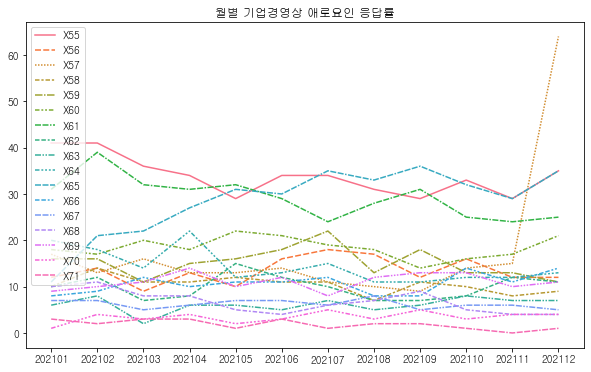

In [40]:
plt.figure(figsize = (10,6))
sns.lineplot(data=all_EOS_X3)
plt.title('월별 기업경영상 애로요인 응답률')
plt.show()

### 3. 기업의 경기 전망과 매출액의 상관관계

#### 1) 데이터 분리

In [67]:
data = pd.read_excel(EOS[0])

In [68]:
#제조업 서비스업 코드 분리
produce = [14,15,24,28,32,17,10,20,25,26,29,30,13,16,22,31,11,21,23,18,27,33]
produce = sorted(produce)

service = list(set.difference(set(data['X3'].unique()),set(produce)))

In [69]:
#제조업 분리
def sep_manu(data, listing,date):
    manu = pd.DataFrame()
    for i in listing:
        cho_manu = data.loc[data['X3']==i]
        manu = pd.concat([manu,cho_manu],axis=0)
    manu.reset_index(drop=True,inplace=True)
    manu['date'] = date
    return manu

In [70]:
total_manu = pd.DataFrame()
for i in EOS:
    eos = pd.read_excel(i)
    sep = sep_manu(eos,produce,i)
    total_manu = pd.concat([total_manu,sep],axis=0)

In [71]:
total_manu.head()

,WT,X1,X2,X3,X16,X17,X17_1,X20,X21,X30,...,X63,X64,X65,X66,X67,X68,X69,X70,X71,date
0,4395.72,11,2,10,1,1,2,2,2,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,202101.xlsx
1,4395.72,11,3,10,1,2,2,1,1,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,202101.xlsx
2,6416.74,31,5,10,2,2,2,4,3,4.0,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,202101.xlsx
3,4395.72,31,3,10,1,1,2,3,3,3.0,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,202101.xlsx
4,4395.72,31,2,10,1,1,2,2,2,2.0,...,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,202101.xlsx


In [72]:
total_non_manu = pd.DataFrame()
for i in EOS:
    eos = pd.read_excel(i)
    sep = sep_manu(eos,service,i)
    total_non_manu = pd.concat([total_non_manu,sep],axis=0)

In [73]:
total_non_manu.head()

,WT,X1,X2,X3,X16,X17,X17_1,X20,X21,X30,...,X63,X64,X65,X66,X67,X68,X69,X70,X71,date
0,4770.53,23,3,41,1,2,2,3,3,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,202101.xlsx
1,4770.53,30,2,41,1,1,2,3,3,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,202101.xlsx
2,4770.53,11,1,41,1,2,2,1,1,0.0,...,NaN,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,202101.xlsx
3,16623.76,11,7,41,1,1,1,3,3,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,202101.xlsx
4,4770.53,36,1,41,1,2,2,1,1,0.0,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,202101.xlsx


#### 2) 제조업 기업별 애로사항 분석

In [74]:
def df_complain(data):
    df = data.groupby(['date']).count()
    df = df[['X55','X56', 'X57', 'X58', 'X59', 'X60', 'X61', 'X62', 'X63', 'X64', 'X65','X66', 'X67', 'X68', 'X69', 'X70', 'X71']]
    
    index_list = []
    for i in manu.index:
        index_list.append(i.split('.')[0])

    df.index = index_list
    return df

In [75]:
def complain_plot(data,tp):
    for i in data.columns:
        plt.figure(figsize = (10,6))
        sns.barplot(x = data.index,y=i, data=data)
        plt.title('월별 기업경영상 애로요인 응답률 %s (%s)'%(i,tp))
        plt.xticks(rotation=45)
        plt.show()

In [76]:
manu = df_complain(total_manu)
manu.head()

,X55,X56,X57,X58,X59,X60,X61,X62,X63,X64,X65,X66,X67,X68,X69,X70,X71
202101,955,273,303,340,394,273,590,205,93,285,387,132,126,204,173,60,15
202102,952,247,336,359,383,291,614,234,83,256,489,171,137,240,189,65,16
202103,865,209,325,347,436,296,582,209,69,239,531,157,127,202,149,44,9
202104,886,196,315,333,453,313,592,225,72,245,614,177,126,140,172,52,9
202105,841,194,283,342,442,350,615,262,74,227,671,201,118,133,140,53,16


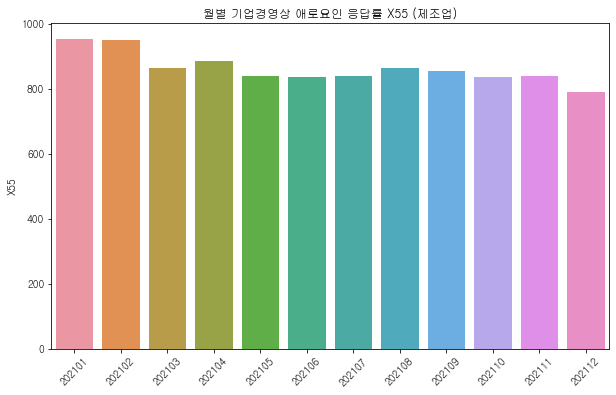

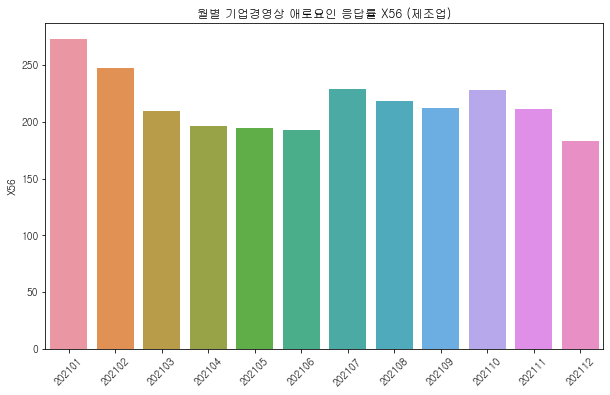

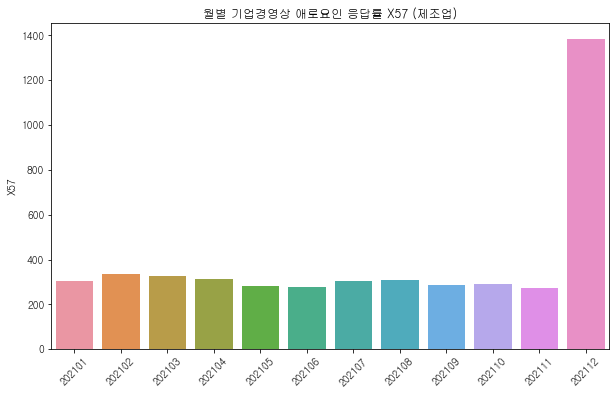

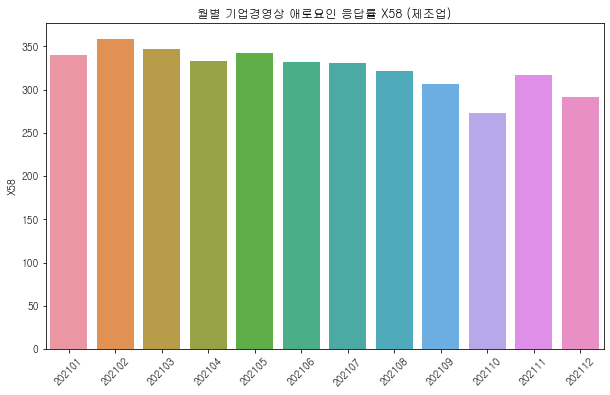

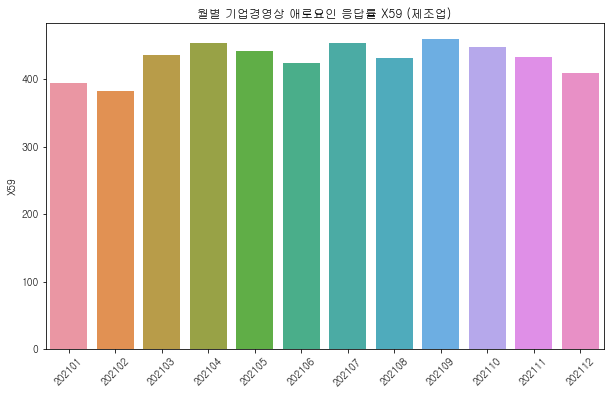

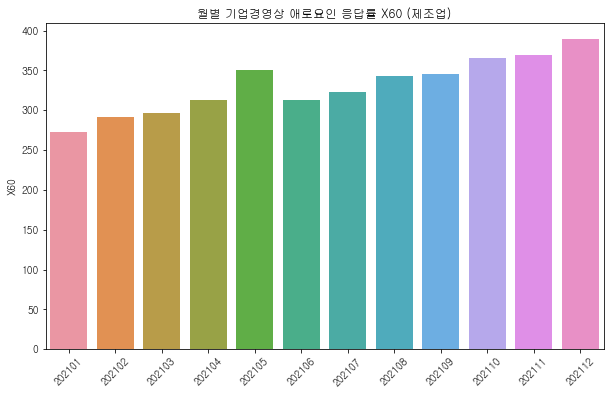

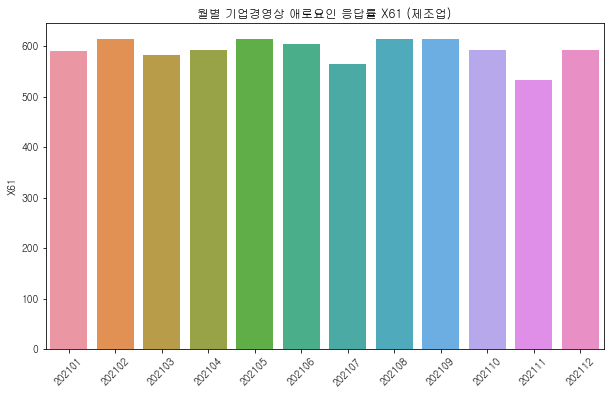

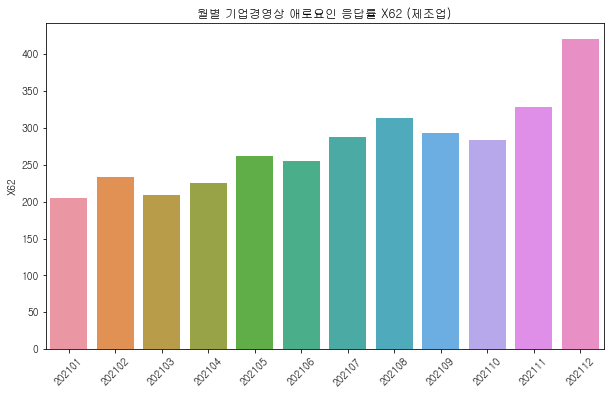

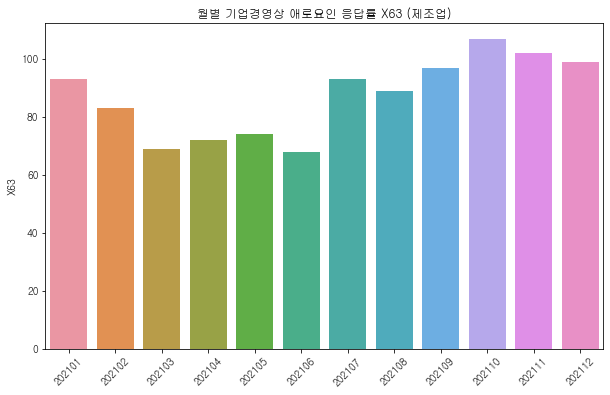

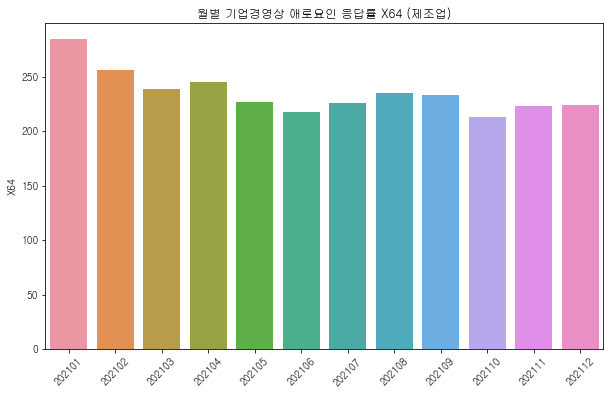

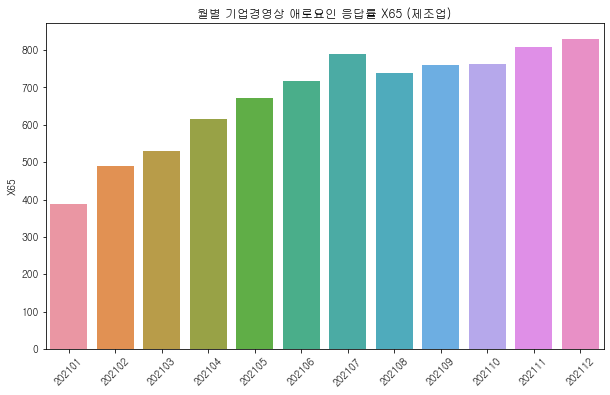

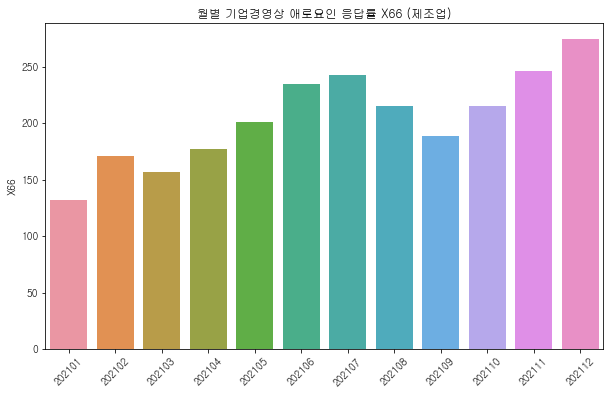

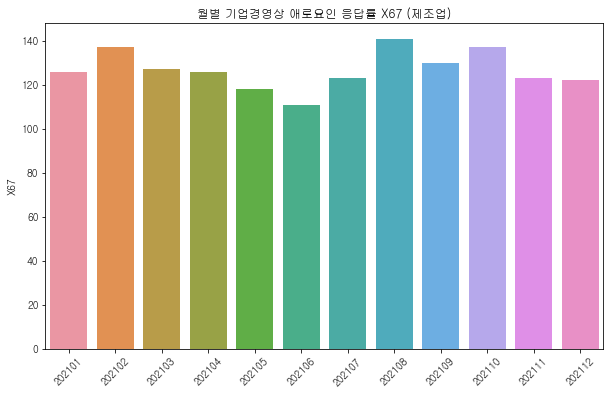

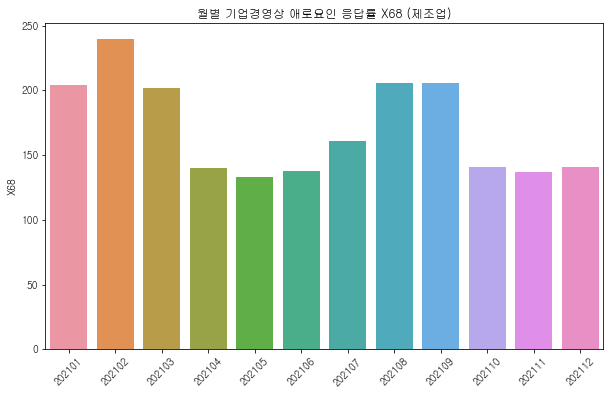

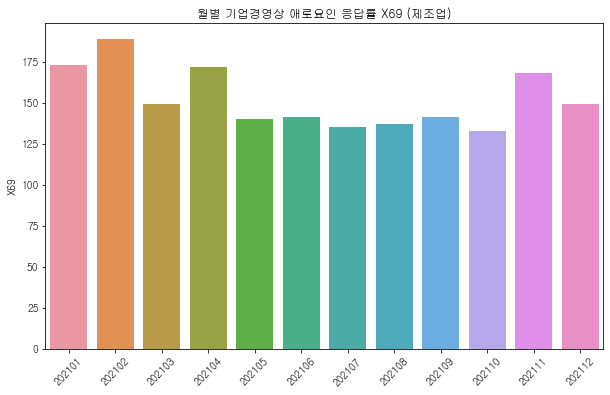

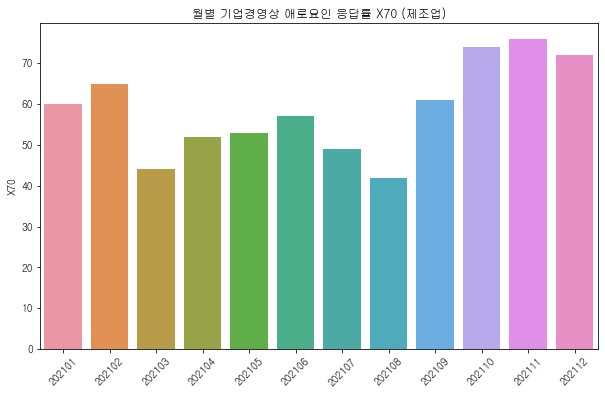

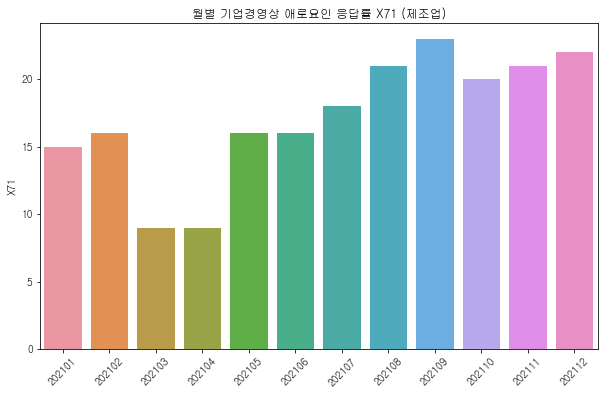

In [77]:
complain_plot(manu,'제조업')

꾸준히 불만이 많은 항목
1. X55 (내수부진) : 900~800
2. X61 (인건비 상승) : 600
3. X59 (업체간 과당경쟁) : 400
#4. X65 (원재료 가격 상승) : 400

불만이 상승하는 항목
1. X65 (원자재(원자료) 가격 상승) : 400 ~ 800
2. X60 (인력확보난) : 200 ~400
3. X62 (물류비 상승 및 운송난) : 200 ~ 400
4. 66 (원재료 구득난) : 150 ~ 300

#### 2) 비제조업 업종별 기업별 애로사항 분석

In [78]:
non_manu = df_complain(total_non_manu)
non_manu.head()

,X55,X56,X57,X58,X59,X60,X61,X62,X63,X64,X65,X66,X67,X68,X69,X70,X71
202101,1091,63,209,336,641,247,677,105,102,123,157,19,62,292,46,58,20
202102,1090,43,230,353,660,232,755,114,94,107,167,18,65,311,33,41,28
202103,978,32,188,315,639,240,645,111,70,99,176,21,58,276,35,38,25
202104,1050,38,186,357,742,281,668,121,73,110,244,22,57,228,36,48,31
202105,1034,36,190,333,727,301,659,125,85,113,230,30,64,205,32,47,33


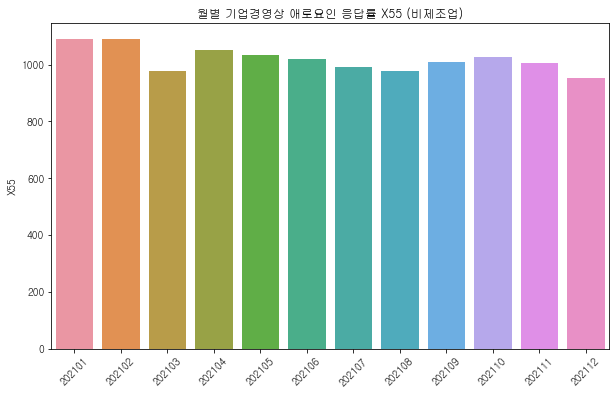

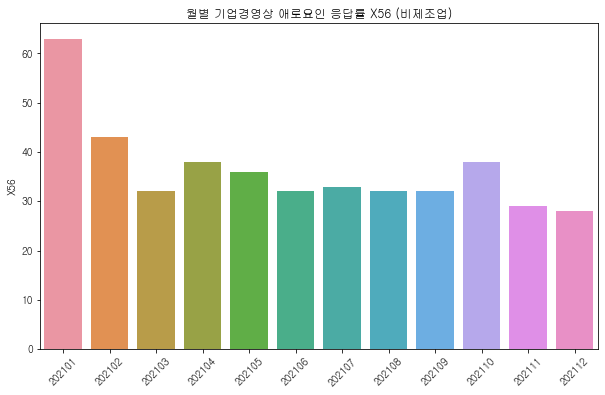

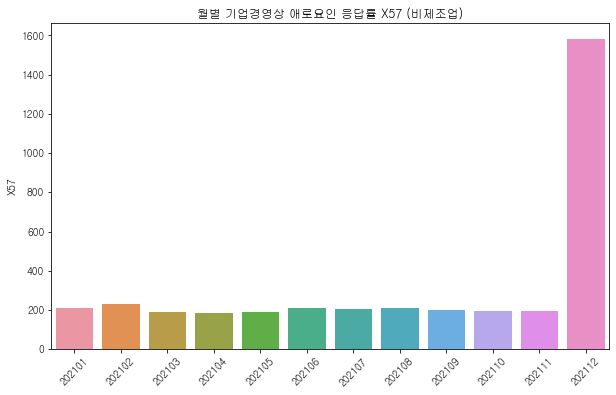

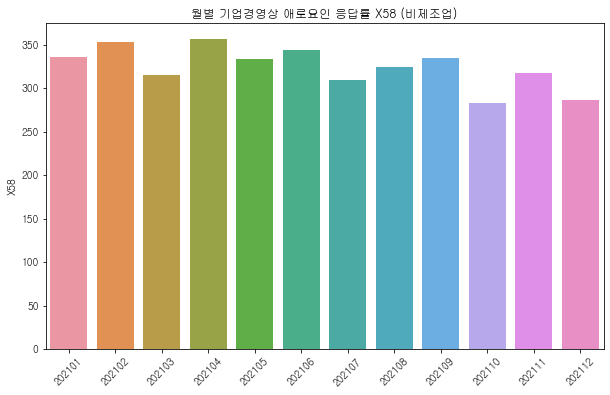

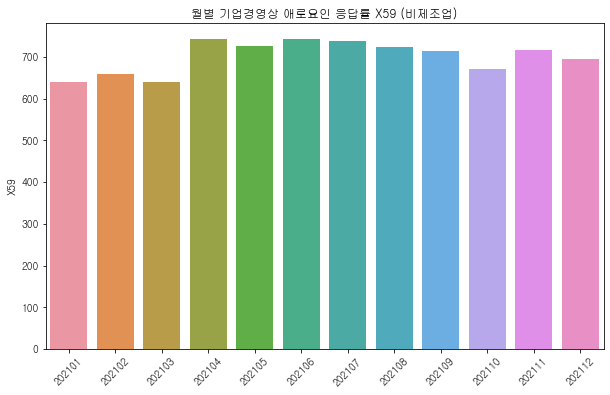

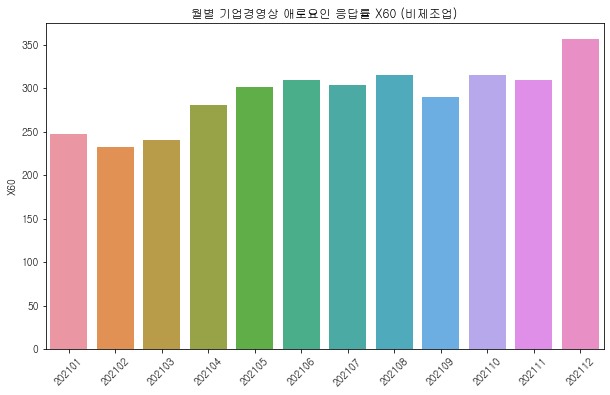

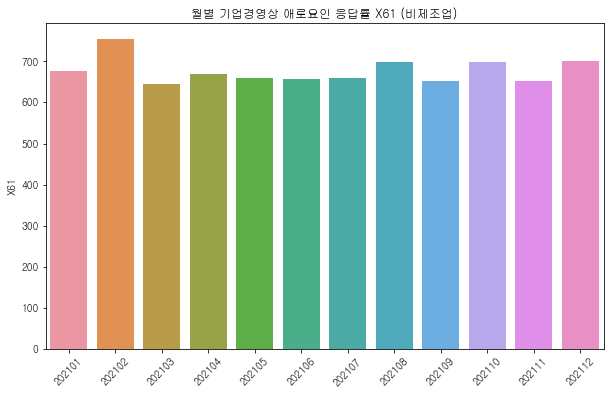

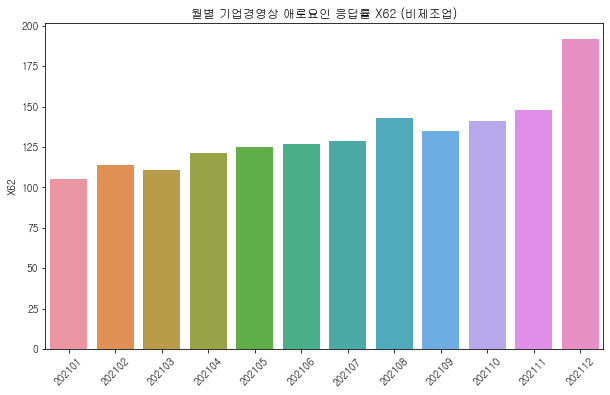

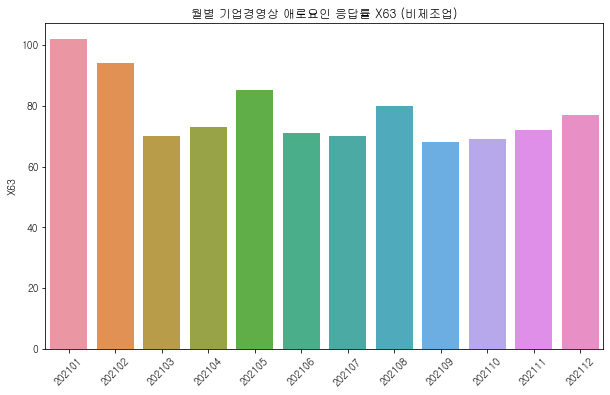

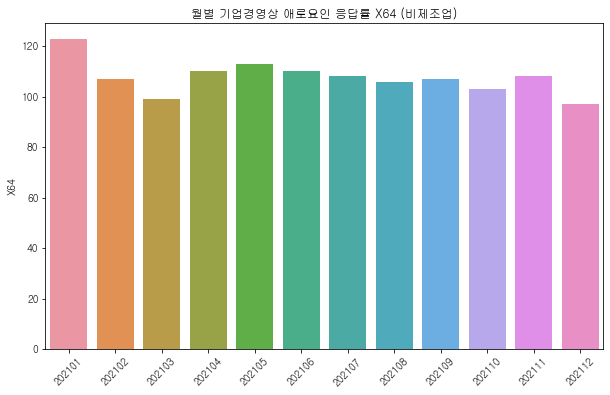

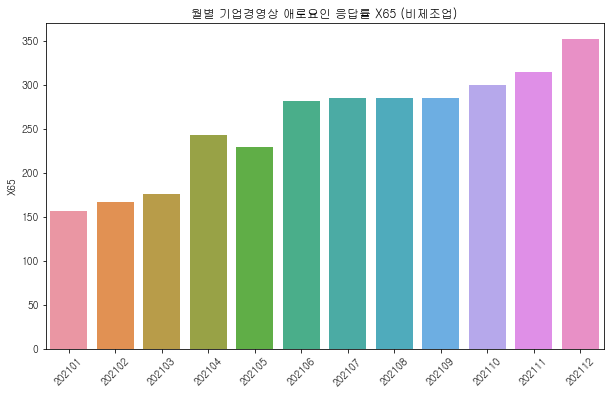

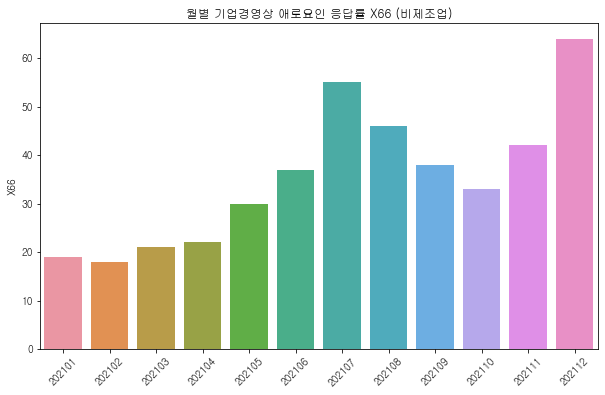

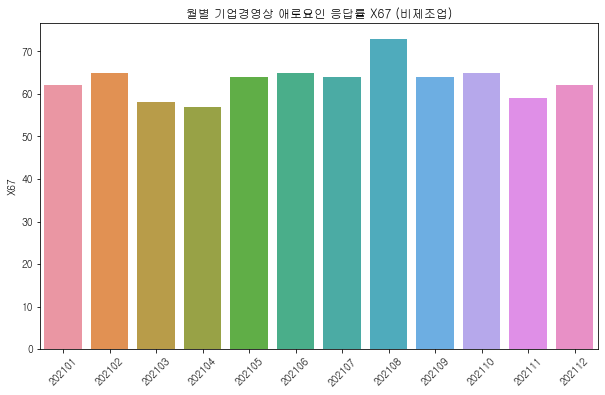

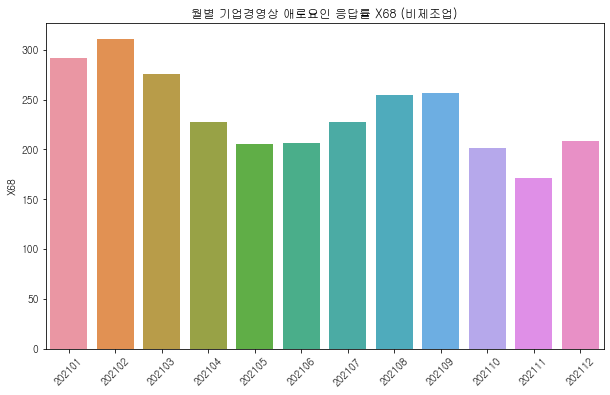

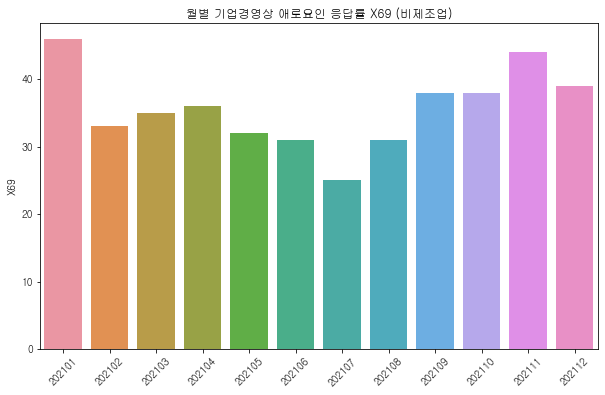

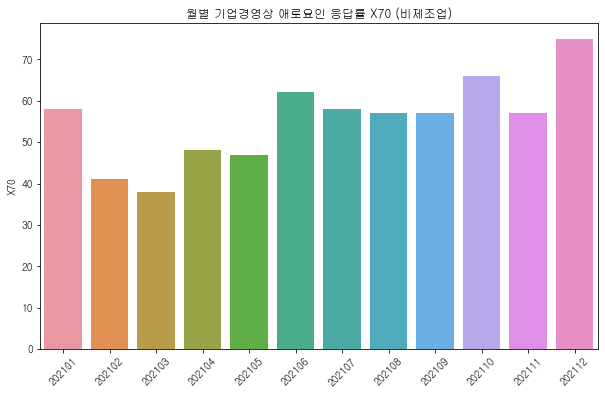

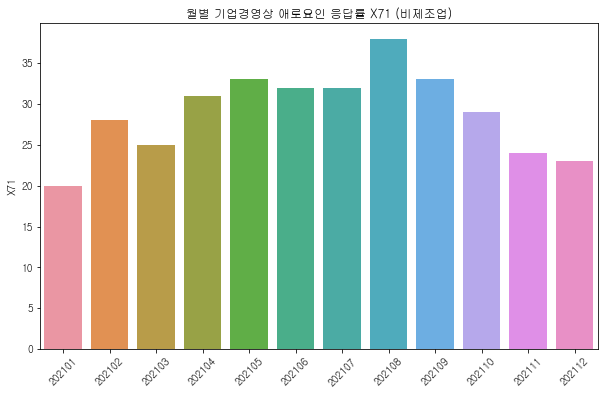

In [79]:
complain_plot(non_manu,'비제조업')

꾸준히 불만이 많은 항목
1. X55 (내수부진) : 1000~900
2. X59 (업체간 과당경쟁) : 700
3. X61 (인건비 상승) : 600

불만이 상승하는 항목
1. X65 (원자재(원자료) 가격 상승) : 150~350
2. X62 (물류비 상승 및 운송난) : 100~200
3. X60 (인력확보난) :250~270

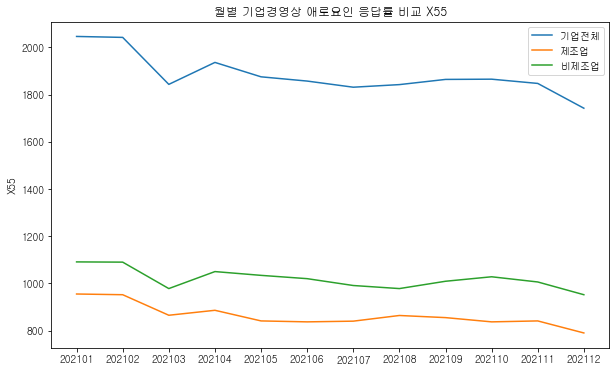

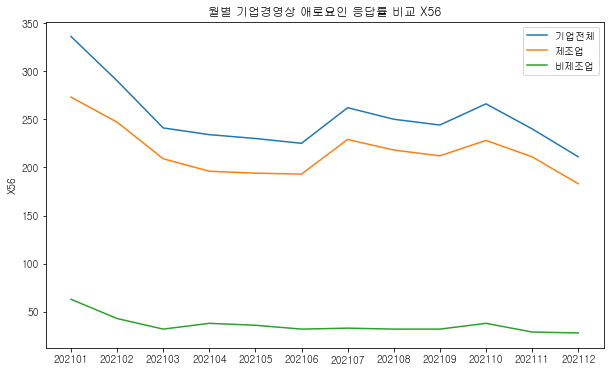

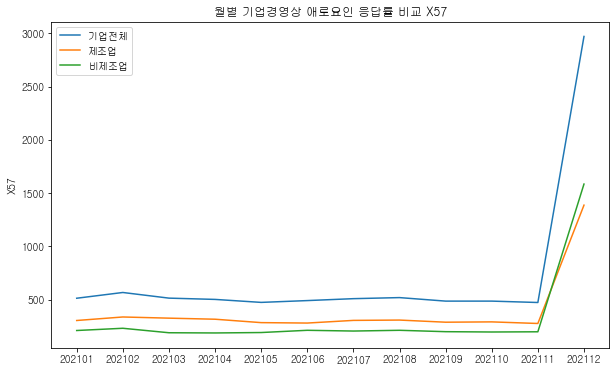

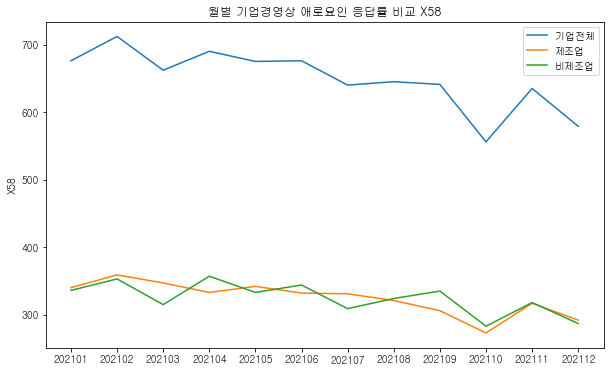

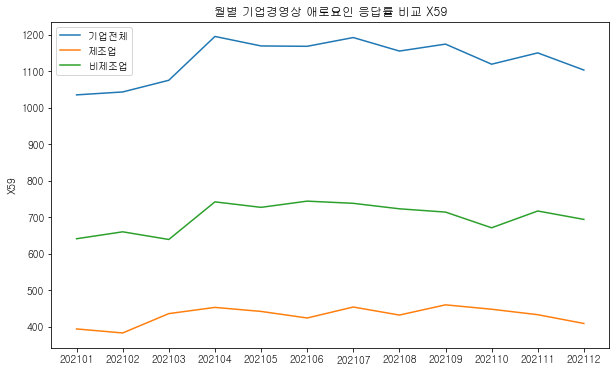

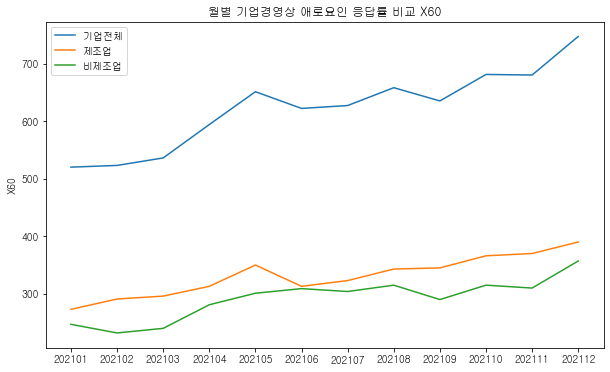

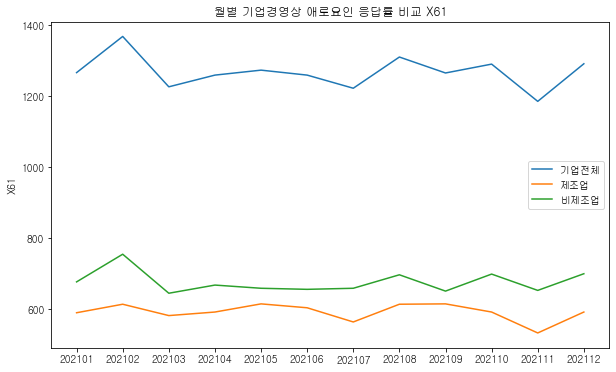

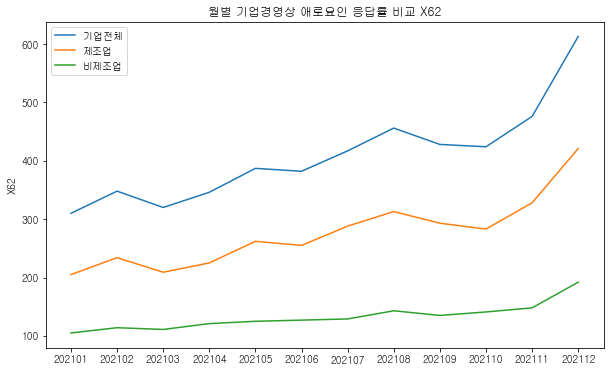

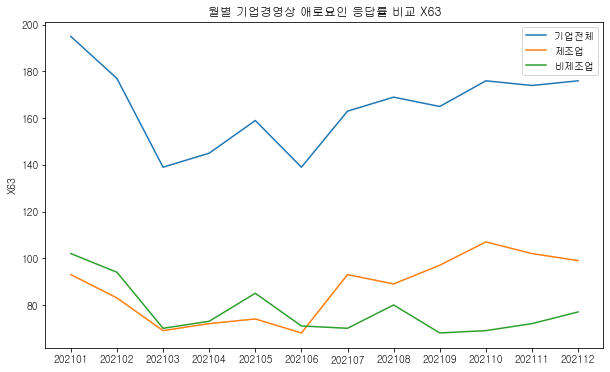

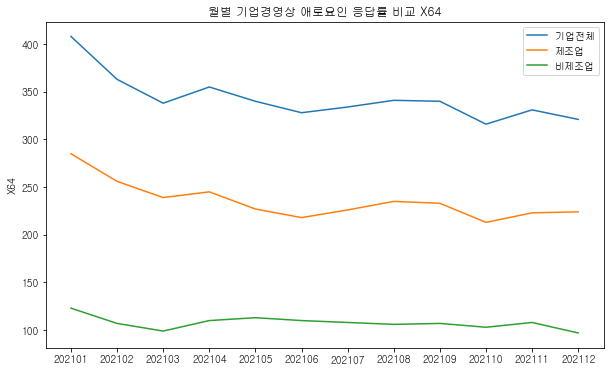

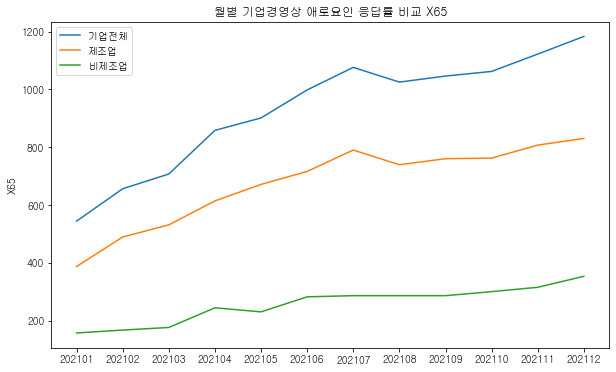

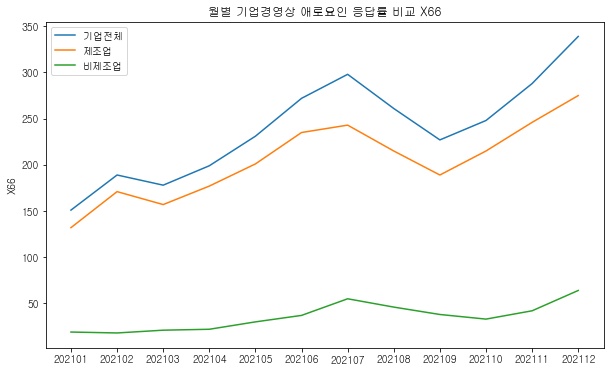

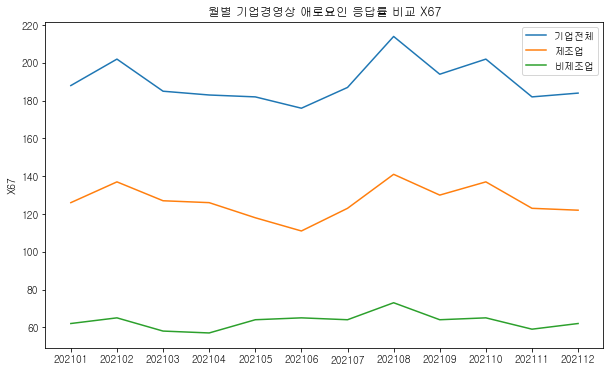

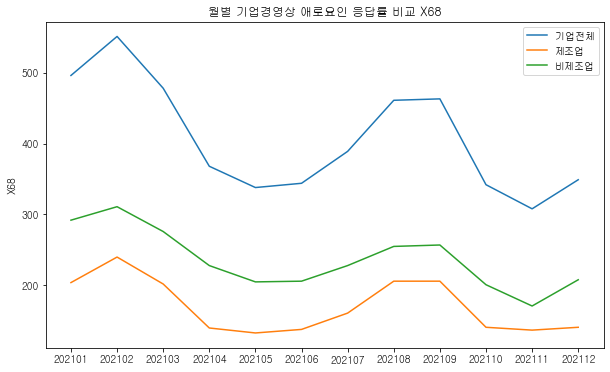

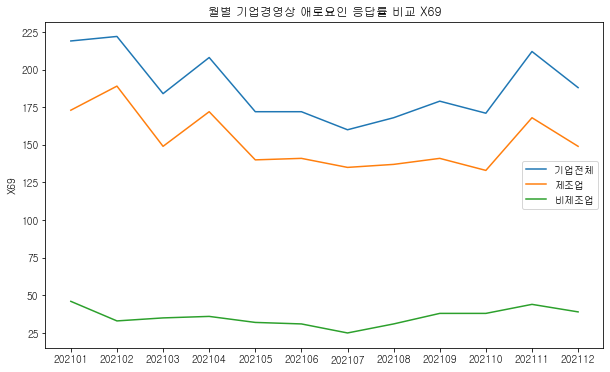

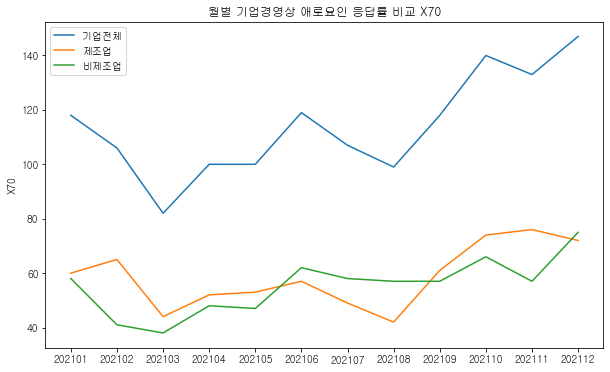

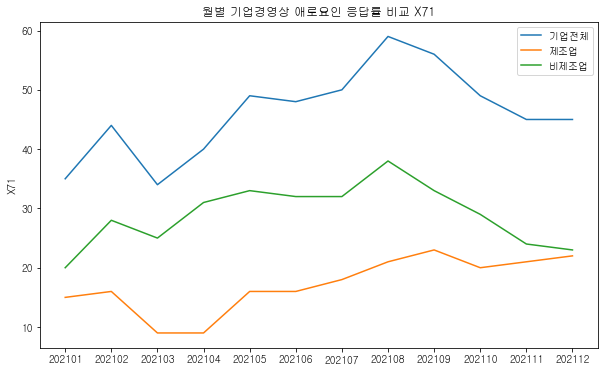

In [83]:
for i in all_EOS.columns:
    plt.figure(figsize = (10,6))
    sns.lineplot(x = all_EOS.index,y=i, data=all_EOS,label='기업전체')
    sns.lineplot(x = manu.index,y=i, data=manu,label='제조업')
    sns.lineplot(x = non_manu.index,y=i, data=non_manu,label='비제조업')
    plt.title('월별 기업경영상 애로요인 응답률 비교 %s'%i)
    plt.legend()
    plt.show()

전체 애로요인 대비, 제조업과 비제조업의 애로요인 정도 파악을 통해 더 민감한 사항 파악 가능

제조업이 더 민감한 사항

1. 강함 (200 < )
	X56 (수출부진) 
	X64 (제품 판매 단가 하락) 
	X65 (원자재 가격상승)
2. 보통 (< 200)
	X69 (환율변동) 120
	X62 (물류비 상승 및 운송난) 
	X66 (원자재 구득난) 
	X67 (설비노후 및 부족)


비제조업이 더 민감한 사항

1. 강함 (200 < )
	X59 (업체간 과당경쟁) 300
	X55 (내수부진) 200
2. 보통 ( < 200)
	X61 (인건비 상승)100
	X68 (계절적 비수기) 100

#### 3) 요약

> 전체 데이터

- X55 (기업경영상 애로요인) 이후로 결측값이 매우 많음
→ 불만 요인 파악 가능

꾸준히 불만이 많은 항목
1. X55 (내수 부진) : 2000
2. X61 (인건비 상승) : 1200~1400
3. X59 (업체당 과당경쟁) : 1000~1200


우상향 하는 응답항목 = 응답이 많아 지는 응답항목
1. X65 (600 ~ 1200) : (원재료 가격 상승) : 600 ~ 1200
2. X60 (인력확보난) : 500~700
3. X62 (물류비 상승 및 운송난) : 300 ~ 600
4. X66 (원재료 구득난) : 150 ~ 350

특이 케이스
1. X57 (판매대금회수 지연) : 3000    
 202112년만 응답

> 제조업

꾸준히 불만이 많은 항목
1. X55 (내수부진) : 900~800
2. X61 (인건비 상승) : 600
3. X59 (업체간 과당경쟁) : 400
#4. X65 (원재료 가격 상승) : 400

불만이 상승하는 항목
1. X65 (원자재(원자료) 가격 상승) : 400 ~ 800
2. X60 (인력확보난) : 200 ~400
3. X62 (물류비 상승 및 운송난) : 200 ~ 400
4. 66 (원재료 구득난) : 150 ~ 300


> 비제조업

꾸준히 불만이 많은 항목
1. X55 (내수부진) : 1000~900
2. X59 (업체간 과당경쟁) : 700
3. X61 (인건비 상승) : 600

불만이 상승하는 항목
1. X65 (원자재(원자료) 가격 상승) : 150~350
2. X62 (물류비 상승 및 운송난) : 100~200
3. X60 (인력확보난) :250~270
---
전체 애로요인 대비, 제조업과 비제조업의 애로요인 정도 파악을 통해 더 민감한 사항 파악 가능

> 제조업이 더 민감한 사항

1. 강함 (200 < )    
	X56 (수출부진)     
	X64 (제품 판매 단가 하락)     
	X65 (원자재 가격상승)     
    
2. 보통 (< 200)    
	X69 (환율변동) 120    
	X62 (물류비 상승 및 운송난)     
	X66 (원자재 구득난)     
	X67 (설비노후 및 부족)    


> 비제조업이 더 민감한 사항

1. 강함 (200 < )    
	X59 (업체간 과당경쟁) 300    
	X55 (내수부진) 200    
    
2. 보통 ( < 200)    
	X61 (인건비 상승)100    
	X68 (계절적 비수기) 100    


#### 4) 결론
1. 제조업과 비제조업 모두 꾸준히 불만이 많은 항목이 대부분 일치한다
2. 제조업은 원재료 가격 상승, 비제조업은 인력확보난에서 불만이 증가하고 있다
3. 제조업과 비제조업의 민감한 사항에 차이가 존재한다
4. 제조업의 기업경영상 애로요인은 국제 정세에 더 민감하며 비제조업은 국내 정세에 더 민감하다

? 제조업과 비제조업은 일시적, 구조적 리스크중 어디에 더 많이 해당하는가 ?